In [1]:
cd ..

/Users/yusuke/code/neylabelmaachi/schoolpred


# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# SKLEARN
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, precision_recall_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.neural_network import MLPClassifier
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV


# Others
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from collections import Counter


# Custom methods
from dropout_pred.data import DropoutPred
from dropout_pred.utils import *

# Config
pd.set_option('display.max_columns', None)

# Data Cleaning

In [3]:
data = DropoutPred.get_training_data()
data.head()

,hhid,gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,read_one_lang,write_one_lang,no_read_write,parents_level_ed,work_activity,number_of_person_in_hh,type_housing,automobiles,mobile_phones,satellite_receivers,no_water,individual_water_net,electrical_net_co,school_id,child_enrollment,class_when_dropout,region,province,age_dropout,schoolunitid,type_unit,groupid,num_menage,done_test,digit_recognition_res,number_recognition_res,subtraction_res,division_res
0,A208004,1.0,1.0,1.0,35.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,5.0,3.0,2.0,1.0,1.0,2,2,1,A208,1.0,NaN,Marrakech - Tensift - Al Haouz,Essaouira,NaN,A208,Secteur Scolaire Centre,2,4,1.0,1.0,2.0,2.0,2.0
1,A426002,1.0,1.0,2.0,33.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,3.0,2.0,1.0,2.0,2,2,1,A426,1.0,NaN,Marrakech - Tensift - Al Haouz,Essaouira,NaN,A426,Secteur Scolaire Centre,4,2,2.0,NaN,NaN,NaN,NaN
2,A268006,1.0,1.0,1.0,31.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,7.0,2.0,2.0,1.0,2.0,2,2,2,A446,1.0,NaN,Marrakech - Tensift - Al Haouz,Chichaoua,NaN,A268,Satellite,1,6,1.0,1.0,1.0,2.0,2.0
3,A419004,1.0,2.0,2.0,62.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,6.0,1.0,2.0,1.0,1.0,2,2,1,A419,1.0,NaN,Sous - Massa - Draa,Taroudant,NaN,A419,Secteur Scolaire Centre,2,4,2.0,NaN,NaN,NaN,NaN
4,A536006,1.0,2.0,1.0,36.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,2,2,2,A212,1.0,NaN,Marrakech - Tensift - Al Haouz,Essaouira,NaN,A536,Satellite,1,6,1.0,1.0,1.0,1.0,2.0


In [4]:
data.shape

(4832, 38)

In [5]:
data.set_index("hhid")
# data.dropna(inplace=True)

,gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,read_one_lang,write_one_lang,no_read_write,parents_level_ed,work_activity,number_of_person_in_hh,type_housing,automobiles,mobile_phones,satellite_receivers,no_water,individual_water_net,electrical_net_co,school_id,child_enrollment,class_when_dropout,region,province,age_dropout,schoolunitid,type_unit,groupid,num_menage,done_test,digit_recognition_res,number_recognition_res,subtraction_res,division_res
hhid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A208004,1.0,1.0,1.0,35.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,5.0,3.0,2.0,1.0,1.0,2,2,1,A208,1.0,NaN,Marrakech - Tensift - Al Haouz,Essaouira,NaN,A208,Secteur Scolaire Centre,2,4,1.0,1.0,2.0,2.0,2.0
A426002,1.0,1.0,2.0,33.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,3.0,2.0,1.0,2.0,2,2,1,A426,1.0,NaN,Marrakech - Tensift - Al Haouz,Essaouira,NaN,A426,Secteur Scolaire Centre,4,2,2.0,NaN,NaN,NaN,NaN
A268006,1.0,1.0,1.0,31.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,7.0,2.0,2.0,1.0,2.0,2,2,2,A446,1.0,NaN,Marrakech - Tensift - Al Haouz,Chichaoua,NaN,A268,Satellite,1,6,1.0,1.0,1.0,2.0,2.0
A419004,1.0,2.0,2.0,62.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,6.0,1.0,2.0,1.0,1.0,2,2,1,A419,1.0,NaN,Sous - Massa - Draa,Taroudant,NaN,A419,Secteur Scolaire Centre,2,4,2.0,NaN,NaN,NaN,NaN
A536006,1.0,2.0,1.0,36.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,2,2,2,A212,1.0,NaN,Marrakech - Tensift - Al Haouz,Essaouira,NaN,A536,Satellite,1,6,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A618007,1.0,1.0,1.0,37.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,5.0,2.0,2.0,1.0,2.0,2,2,1,A618,1.0,NaN,Marrakech - Tensift - Al Haouz,El Kelaa Des Sraghna,NaN,A618,Secteur Scolaire Centre,2,7,1.0,1.0,1.0,2.0,2.0
A571001,1.0,1.0,1.0,37.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,3.0,1.0,7.0,3.0,2.0,2.0,2.0,2,2,2,A465,1.0,NaN,Marrakech - Tensift - Al Haouz,El Kelaa Des Sraghna,NaN,A571,Satellite,4,1,1.0,1.0,1.0,2.0,2.0
A359007,1.0,1.0,2.0,42.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,6.0,2.0,2.0,2.0,2.0,2,2,2,A359,2.0,3.0,Marrakech - Tensift - Al Haouz,El Kelaa Des Sraghna,8.0,A359,Secteur Scolaire Centre,0,7,1.0,1.0,1.0,2.0,2.0


## Encoding Target

In [6]:
data_cpy = data.copy()

In [7]:
# 1 - Dropout, 0 - enrolled. Reversed it for GridSearch ### TODO! Don't forget to change it back
data['age_dropout'].fillna(0, inplace=True)

values_to_change = [12.0, 11.0, 13.0, 10.0, 9.0, 14.0, 8.0, 7.0, 6.0, 3.0, 15.0, 4.0, 5.0, -9.0, 2.0, 19.0, 17.0, 23.0]
data['age_dropout'] = data['age_dropout'].replace(values_to_change, 1)

/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_15843/1096098517.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,ax=ax,fmt='0.1')


<AxesSubplot:>

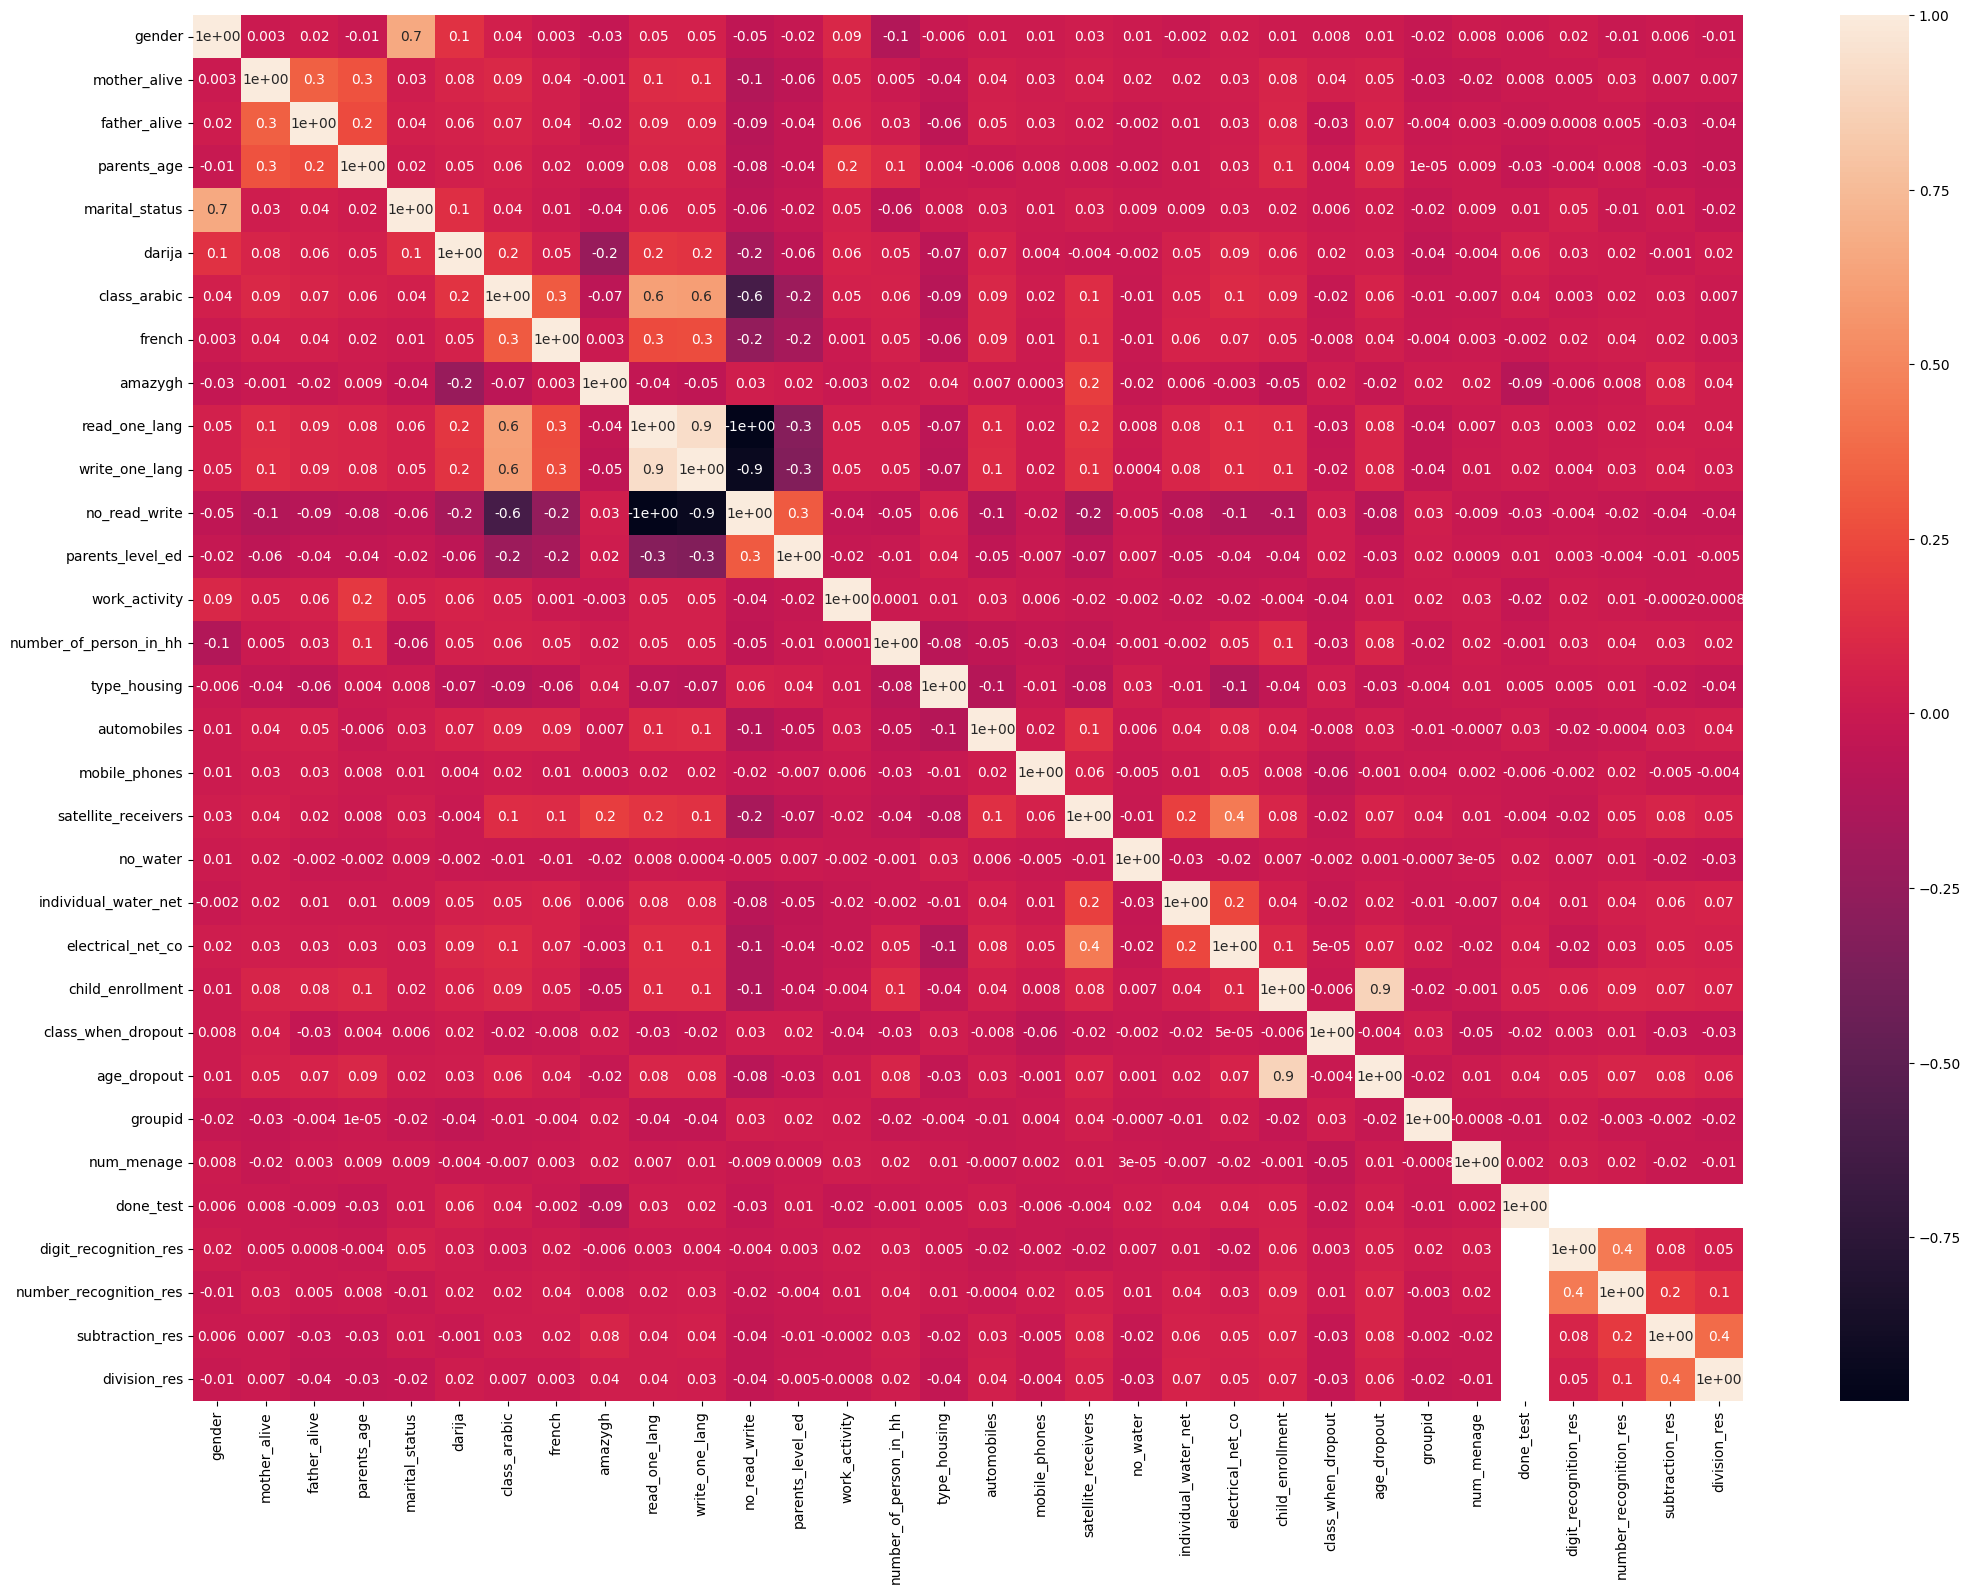

In [8]:
fix,ax=plt.subplots(1,1,figsize=(25,18))
sns.heatmap(data.corr(),annot=True,ax=ax,fmt='0.1')

In [9]:
data["region"].value_counts()

Marrakech - Tensift - Al Haouz    1898
Sous - Massa - Draa               1568
Meknhs - Tafilalet                 743
Tadla - Azilal                     330
L'Oriental                         293
Name: region, dtype: int64

In [10]:
data["province"].value_counts()

Essaouira               853
Taroudant               822
Ouarzazate              544
Chichaoua               474
El Kelaa Des Sraghna    348
Azilal                  330
Khenifra                243
Al Haouz                223
Errachidia              213
Meknes                  164
Chtouka Ait Baha        139
Nador                   110
Taourirt                103
Jerada                   80
El Hajeb                 75
Tiznit                   63
Ifrane                   48
Name: province, dtype: int64

In [11]:
data.groupby("province").count()

,hhid,gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,read_one_lang,write_one_lang,no_read_write,parents_level_ed,work_activity,number_of_person_in_hh,type_housing,automobiles,mobile_phones,satellite_receivers,no_water,individual_water_net,electrical_net_co,school_id,child_enrollment,class_when_dropout,region,age_dropout,schoolunitid,type_unit,groupid,num_menage,done_test,digit_recognition_res,number_recognition_res,subtraction_res,division_res
province,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Al Haouz,223,223,218,214,219,216,220,220,220,220,218,218,218,216,211,223,222,220,218,220,223,223,223,223,222,70,223,223,223,223,223,223,220,164,161,163,164
Azilal,330,330,326,321,327,319,327,327,327,327,323,323,323,322,322,328,328,329,330,330,330,330,330,330,328,94,330,330,330,330,330,330,287,171,171,170,171
Chichaoua,474,474,468,460,468,458,464,464,464,464,440,440,440,459,455,473,471,468,470,468,474,474,474,474,471,135,474,474,474,474,474,474,448,324,323,322,324
Chtouka Ait Baha,139,139,139,135,138,136,137,137,137,137,137,137,137,137,136,139,136,138,138,138,139,139,139,139,137,18,139,139,139,139,139,139,118,81,81,81,81
El Hajeb,75,75,72,72,72,72,72,72,72,72,68,68,68,72,71,75,74,74,74,75,75,75,75,75,75,13,75,75,75,75,75,75,71,55,55,55,55
El Kelaa Des Sraghna,348,346,348,347,346,343,348,348,348,348,341,341,341,346,341,346,346,346,345,347,348,348,348,348,345,98,348,348,348,348,348,348,317,277,277,275,278
Errachidia,213,213,205,207,207,200,207,207,207,207,201,201,201,207,206,212,210,208,212,211,213,213,213,213,212,46,213,213,213,213,213,213,204,143,143,141,143
Essaouira,853,853,831,827,831,832,837,837,837,837,828,828,828,821,815,848,848,842,844,842,853,853,853,853,851,236,853,853,853,853,853,853,799,581,581,578,582
Ifrane,48,48,46,45,46,46,46,46,46,46,45,45,45,46,46,48,48,47,47,48,48,48,48,48,48,8,48,48,48,48,48,48,37,27,27,27,27


## Geography

<AxesSubplot:xlabel='province', ylabel='count'>

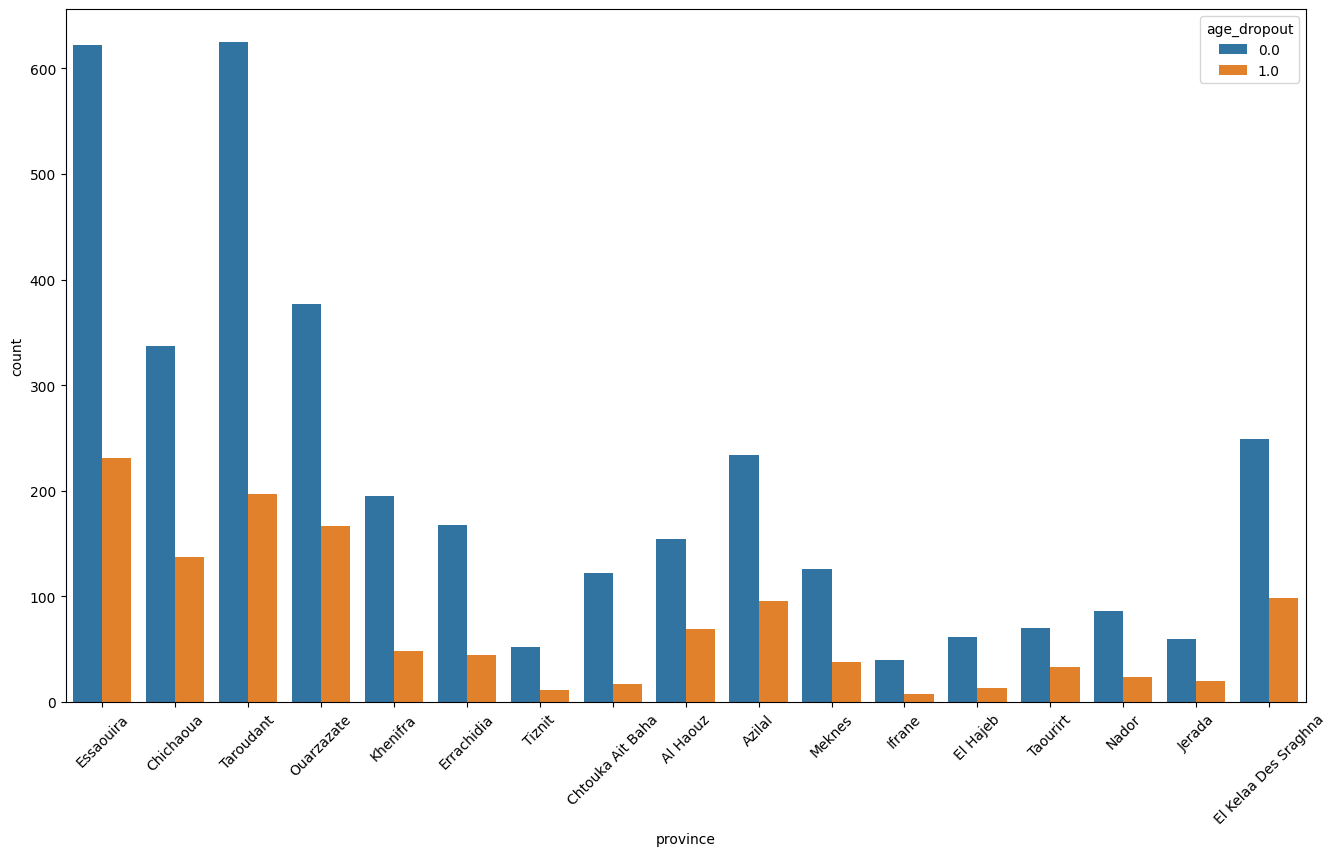

In [12]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=45)

sns.countplot(data=data, x="province", hue="age_dropout")

<AxesSubplot:xlabel='region', ylabel='count'>

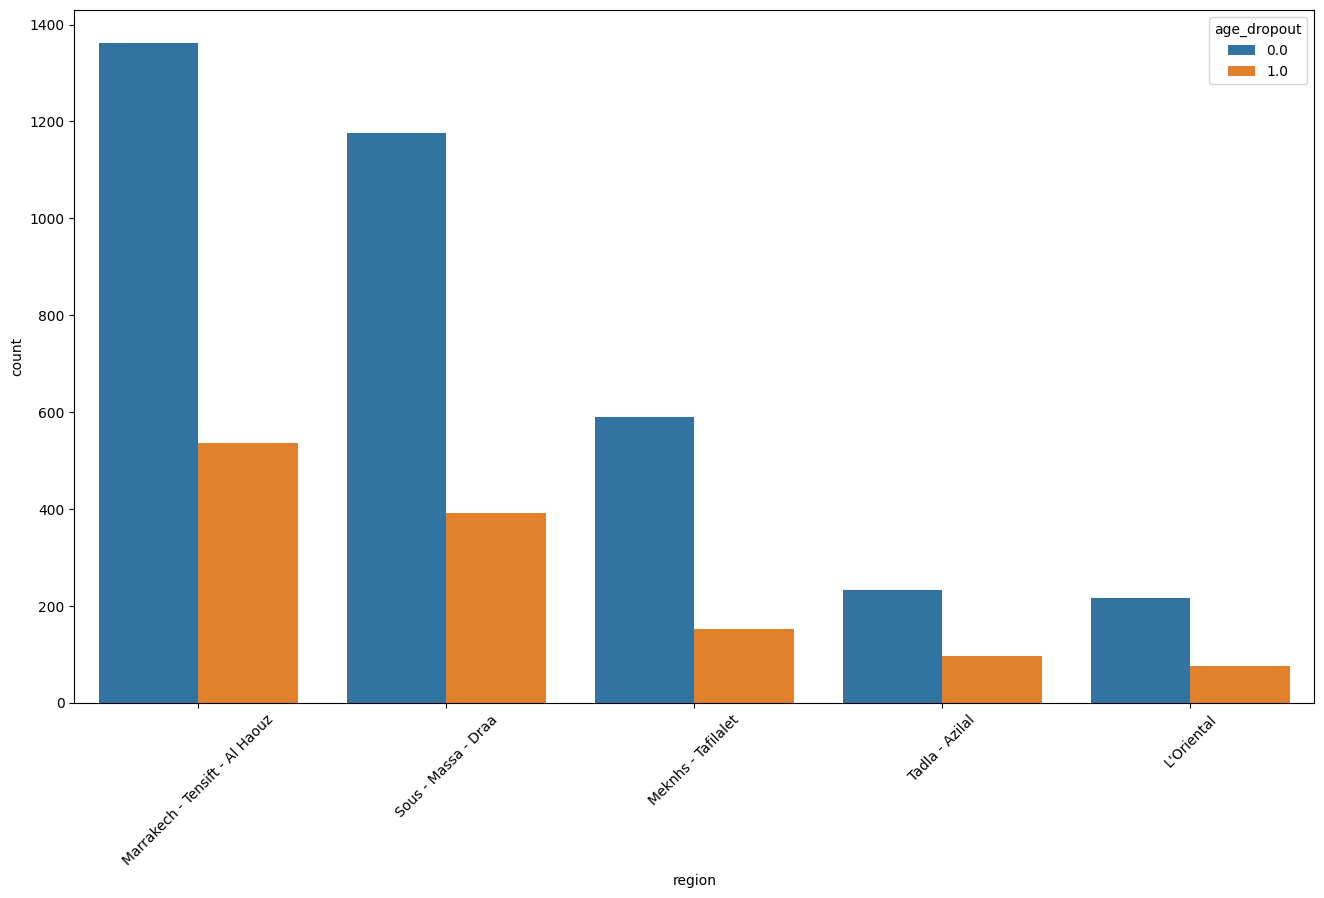

In [13]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=45)

sns.countplot(data=data, x="region", hue="age_dropout")

## Student's Age

<AxesSubplot:xlabel='age_dropout', ylabel='Count'>

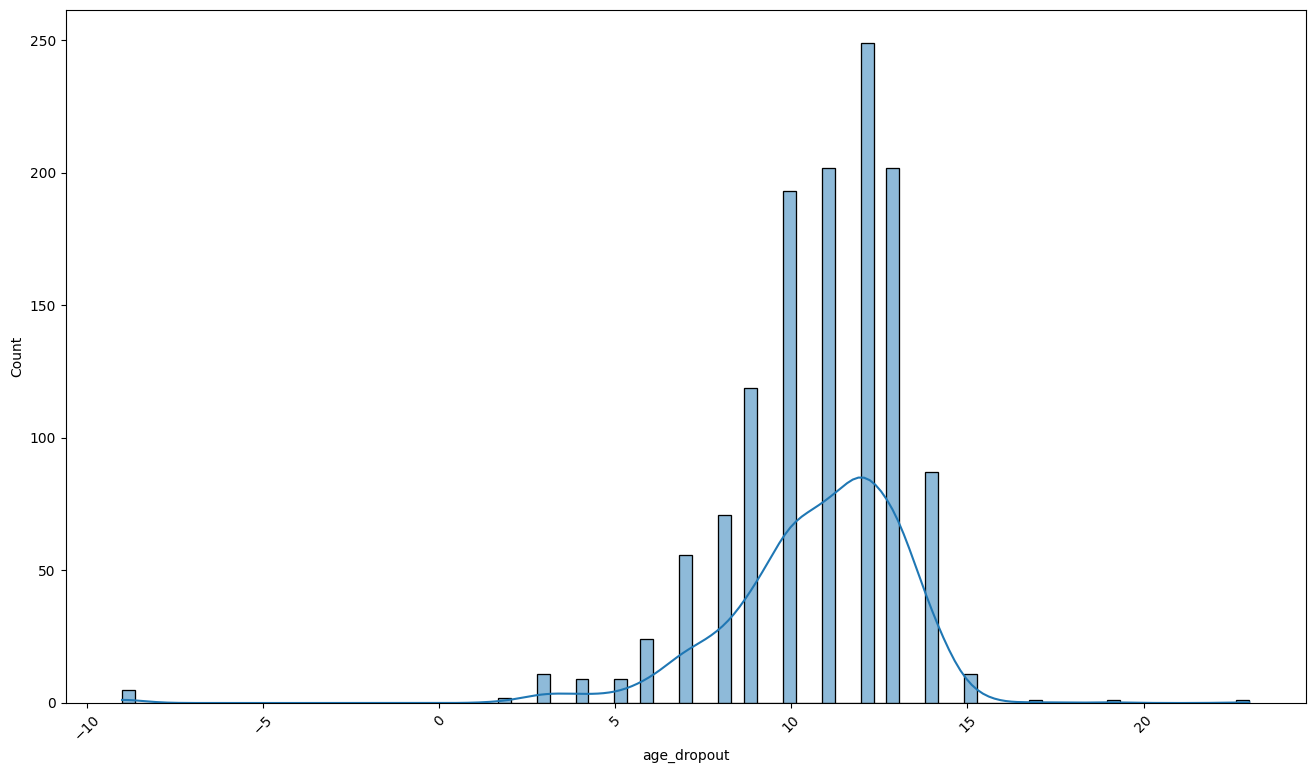

In [14]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=45)

sns.histplot(data=data_cpy, x="age_dropout", kde=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4832 entries, 0 to 4831
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hhid                    4832 non-null   object 
 1   gender                  4825 non-null   float64
 2   mother_alive            4733 non-null   float64
 3   father_alive            4685 non-null   float64
 4   parents_age             4728 non-null   float64
 5   marital_status          4681 non-null   float64
 6   darija                  4749 non-null   float64
 7   class_arabic            4749 non-null   float64
 8   french                  4749 non-null   float64
 9   amazygh                 4749 non-null   float64
 10  read_one_lang           4630 non-null   float64
 11  write_one_lang          4643 non-null   float64
 12  no_read_write           4643 non-null   float64
 13  parents_level_ed        4700 non-null   float64
 14  work_activity           4654 non-null   

In [16]:
# # 1 - Dropout, 0 - enrolled. Reversed it for GridSearch ### TODO! Don't forget to change it back
# data['age_dropout'].fillna(0, inplace=True)

# values_to_change = [12.0, 11.0, 13.0, 10.0, 9.0, 14.0, 8.0, 7.0, 6.0, 3.0, 15.0, 4.0, 5.0, -9.0, 2.0, 19.0, 17.0, 23.0]
# data['age_dropout'] = data['age_dropout'].replace(values_to_change, 1)

In [17]:
data["age_dropout"].value_counts()

0.0    3579
1.0    1253
Name: age_dropout, dtype: int64

## Does academic performance affects students?

In [18]:
math_tests = ["age_dropout", "digit_recognition_res", "number_recognition_res", "subtraction_res", "division_res"]

In [19]:
students_with_math_scores = data.groupby("age_dropout").mean()[["digit_recognition_res", "number_recognition_res", "subtraction_res", "division_res"]]
students_with_math_scores

/var/folders/5v/_w5bgw5s3158lt260286m4ym0000gn/T/ipykernel_15843/1842817927.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  students_with_math_scores = data.groupby("age_dropout").mean()[["digit_recognition_res", "number_recognition_res", "subtraction_res", "division_res"]]


,digit_recognition_res,number_recognition_res,subtraction_res,division_res
age_dropout,,,,
0.0,1.008420,1.042920,1.535700,1.595600
1.0,1.021739,1.078788,1.622412,1.662244


In [25]:
data["average_math_score"] = data[["digit_recognition_res", "number_recognition_res", "subtraction_res", "division_res"]].mean(axis=1)
data.columns

Index(['hhid', 'gender', 'mother_alive', 'father_alive', 'parents_age',
       'marital_status', 'darija', 'class_arabic', 'french', 'amazygh',
       'read_one_lang', 'write_one_lang', 'no_read_write', 'parents_level_ed',
       'work_activity', 'number_of_person_in_hh', 'type_housing',
       'automobiles', 'mobile_phones', 'satellite_receivers', 'no_water',
       'individual_water_net', 'electrical_net_co', 'school_id',
       'child_enrollment', 'class_when_dropout', 'region', 'province',
       'age_dropout', 'schoolunitid', 'type_unit', 'groupid', 'num_menage',
       'done_test', 'digit_recognition_res', 'number_recognition_res',
       'subtraction_res', 'division_res', 'average_math_score'],
      dtype='object')

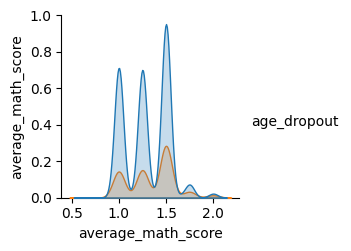

In [26]:
sns.pairplot(data[["age_dropout", "average_math_score"]].dropna(), hue="age_dropout")

In [27]:
final_cols = [
    'mother_alive', 'father_alive', 'parents_age', 'marital_status',
    'parents_level_ed', 'number_of_person_in_hh', 'mobile_phones',
    'individual_water_net', 'work_activity', 'average_math_score',
    'electrical_net_co', 'type_housing', 'age_dropout'
]

In [28]:
data = data[data.columns.intersection(final_cols)]
data.columns

Index(['mother_alive', 'father_alive', 'parents_age', 'marital_status',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'type_housing', 'mobile_phones', 'individual_water_net',
       'electrical_net_co', 'age_dropout', 'average_math_score'],
      dtype='object')

In [29]:
data.shape

(4832, 13)

Text(0.5, 0, 'Average Math Score')

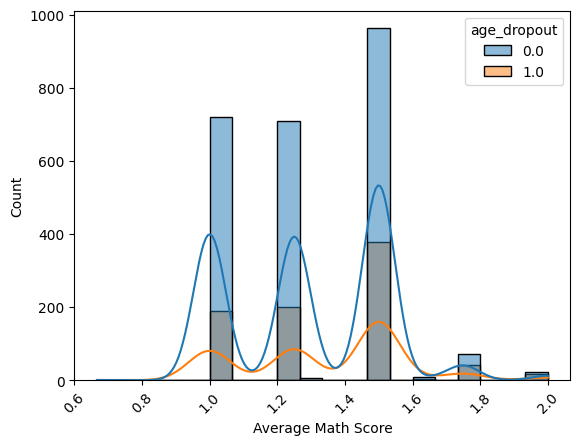

In [76]:
plt.xticks(rotation=45)

sns.histplot(data=data, x="average_math_score", hue="age_dropout", kde=True)
plt.xlabel('Average Math Score')


## Work activity

In [31]:
work_cat = {
    1: "permanent", 
    2: "permanent", 
    3: "part_time", 
    9: "unemployed", 
    4: "unemployed",
    5: "unemployed",
    7: "unemployed",
    8: "unemployed"
}

In [32]:
data["work_activity"].value_counts()

 1.0     1716
 3.0     1446
 2.0      916
 9.0      242
 4.0       89
 5.0       86
 10.0      61
 7.0       61
 8.0       29
 6.0        5
-99.0       3
Name: work_activity, dtype: int64

In [33]:
work_data = data.copy()

In [34]:
work_data.shape

(4832, 13)

In [35]:
work_data.isnull().sum()

mother_alive                99
father_alive               147
parents_age                104
marital_status             151
parents_level_ed           132
work_activity              178
number_of_person_in_hh      15
type_housing                33
mobile_phones               38
individual_water_net         0
electrical_net_co            0
age_dropout                  0
average_math_score        1503
dtype: int64

In [36]:
# Removes na and negative values
work_data = work_data[work_data["work_activity"] > 0]

In [37]:
work_data["work_activity_encoded"] = work_data["work_activity"].map(work_cat)

Text(0.5, 0, 'Work Status')

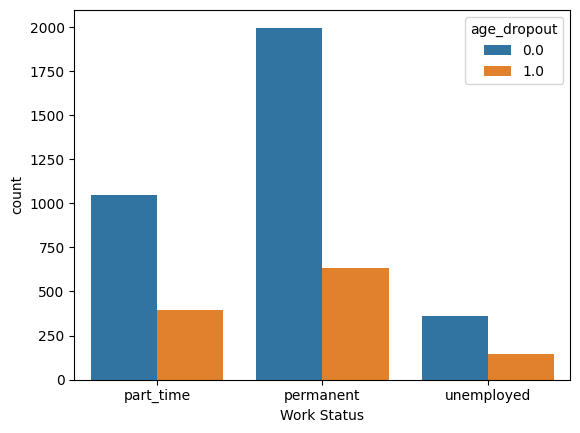

In [75]:
sns.countplot(data=work_data, x="work_activity_encoded", hue="age_dropout")
plt.xlabel('Work Status')

## Marital Status

<AxesSubplot:xlabel='marital_status', ylabel='count'>

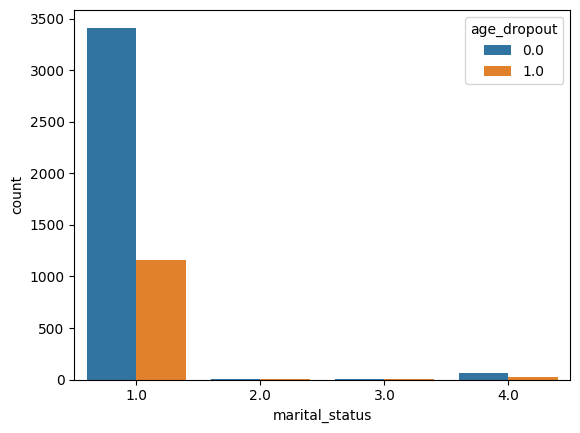

In [39]:
sns.countplot(data=data, x="marital_status", hue="age_dropout")

In [40]:
mar_status = {
    1: "married",
    2: "single",
    3: "divorced",
    4: "widowed"
}

In [41]:
data_mar = data.copy()
data_mar["marital_status_encoded"] = data["marital_status"].map(mar_status)

In [42]:
data_mar["marital_status_encoded"].value_counts()

married     4571
widowed       89
divorced      13
single         8
Name: marital_status_encoded, dtype: int64

<AxesSubplot:xlabel='marital_status_encoded', ylabel='count'>

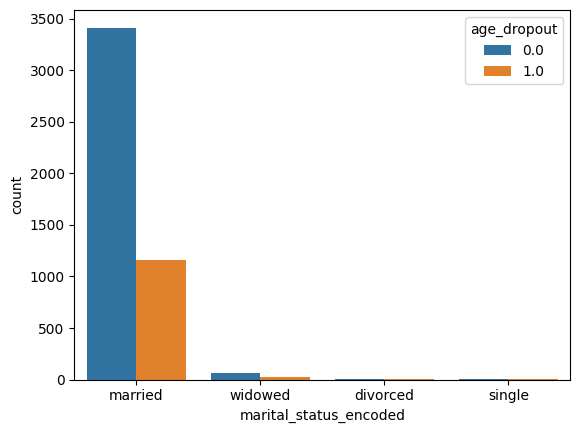

In [74]:
plt.xlabel("Parent's Marital Status")

sns.countplot(data=data_mar, x="marital_status_encoded", hue="age_dropout")

## Household member

In [44]:
data.columns

Index(['mother_alive', 'father_alive', 'parents_age', 'marital_status',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'type_housing', 'mobile_phones', 'individual_water_net',
       'electrical_net_co', 'age_dropout', 'average_math_score'],
      dtype='object')

In [45]:
data["number_of_person_in_hh"].value_counts()

6.0     1094
7.0      952
5.0      855
8.0      643
4.0      400
9.0      398
10.0     188
11.0     119
3.0       71
1.0       18
12.0      17
14.0      13
2.0       11
13.0      10
15.0       8
18.0       5
17.0       4
16.0       3
21.0       2
24.0       2
20.0       1
0.0        1
22.0       1
19.0       1
Name: number_of_person_in_hh, dtype: int64

Text(0.5, 0, 'Number of Household members')

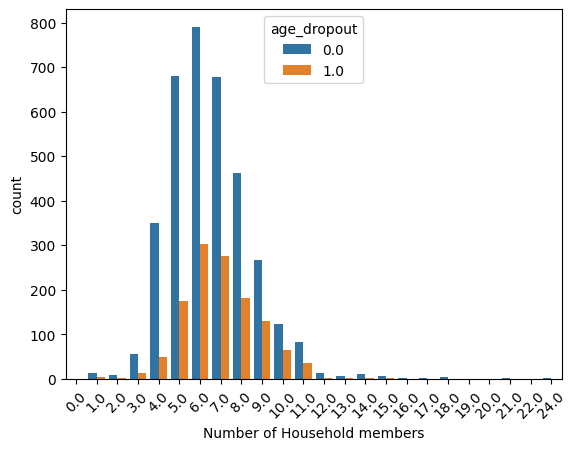

In [73]:
plt.xticks(rotation=45)

sns.countplot(data=data, x="number_of_person_in_hh", hue="age_dropout")
plt.xlabel('Number of Household members')


## House facility

In [47]:
data.columns

Index(['mother_alive', 'father_alive', 'parents_age', 'marital_status',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'type_housing', 'mobile_phones', 'individual_water_net',
       'electrical_net_co', 'age_dropout', 'average_math_score'],
      dtype='object')

In [48]:
# 2 - no
# 1 - yes
data["individual_water_net"].value_counts()

2    4030
1     802
Name: individual_water_net, dtype: int64

In [49]:
#1 - yes
# 2 - no
data["electrical_net_co"].value_counts()

1    2725
2    2107
Name: electrical_net_co, dtype: int64

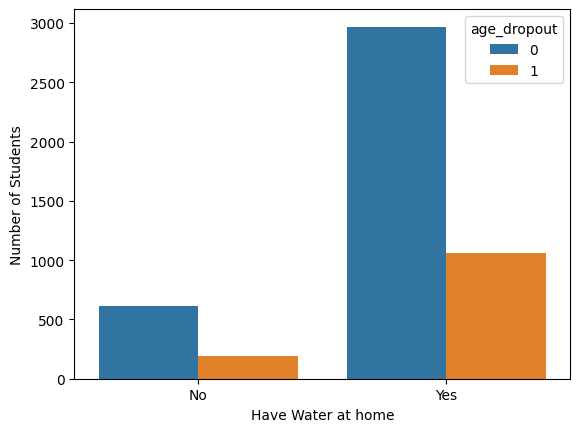

In [50]:
sns.countplot(data=data, x="individual_water_net", hue='age_dropout', hue_order=[0, 1])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Have Water at home')
plt.ylabel('Number of Students')
plt.show()

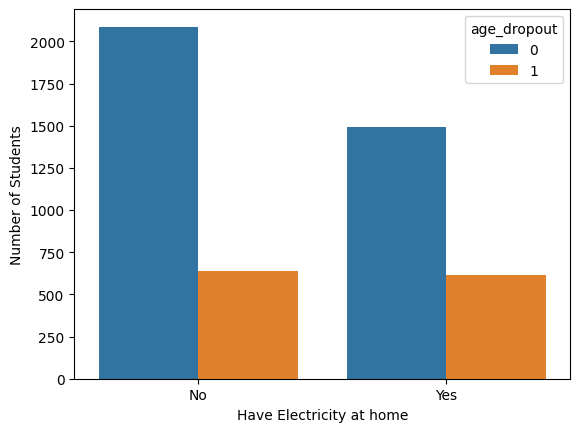

In [51]:
sns.countplot(data=data, x="electrical_net_co", hue='age_dropout', hue_order=[0, 1])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Have Electricity at home')
plt.ylabel('Number of Students')
plt.show()

In [52]:
data.columns

Index(['mother_alive', 'father_alive', 'parents_age', 'marital_status',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'type_housing', 'mobile_phones', 'individual_water_net',
       'electrical_net_co', 'age_dropout', 'average_math_score'],
      dtype='object')

In [53]:
# 1.0    Adobe
# 2.0    Permanent
# 3.0    Dry Stone
# 4.0    Modern
# 5.0    Other

data["type_housing"].value_counts()

3.0    1802
1.0    1589
2.0     934
4.0     457
5.0      17
Name: type_housing, dtype: int64

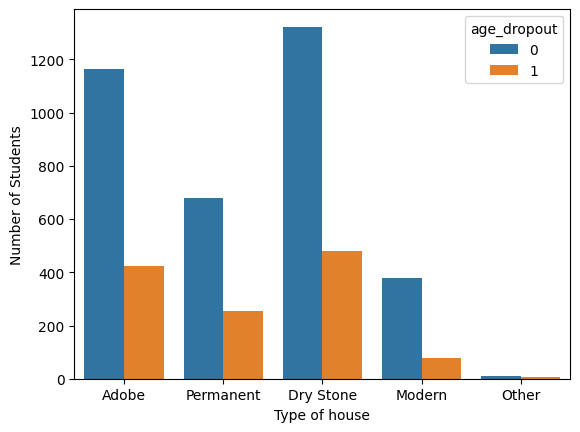

In [54]:
sns.countplot(data=data, x="type_housing", hue='age_dropout', hue_order=[0, 1])

plt.xticks(ticks=[0,1,2,3,4], labels=['Adobe','Permanent', 'Dry Stone', 'Modern', 'Other'])
plt.xlabel('Type of house')
plt.ylabel('Number of Students')
plt.show()

In [55]:
# 1 - yes
# 0 - no
data["mobile_phones"].value_counts()

 1.0     3176
 2.0     1616
-99.0       2
Name: mobile_phones, dtype: int64

In [56]:
tmp = data.copy()
tmp = tmp[tmp["mobile_phones"] > 0]

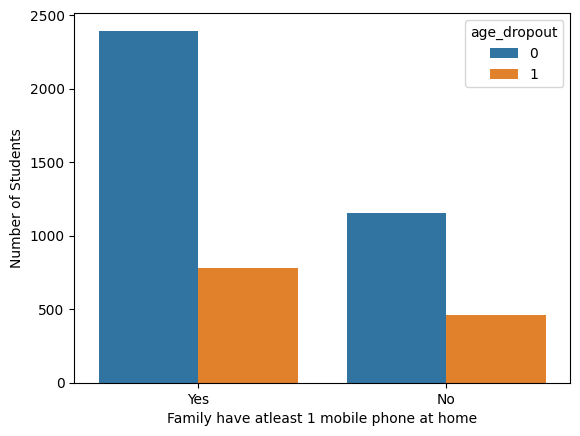

In [57]:
sns.countplot(data=tmp, x="mobile_phones", hue='age_dropout', hue_order=[0, 1])

plt.xticks(ticks=[0,1], labels=['Yes','No'])
plt.xlabel('Family have atleast 1 mobile phone at home')
plt.ylabel('Number of Students')
plt.show()

## Parents available

In [58]:
data.columns

Index(['mother_alive', 'father_alive', 'parents_age', 'marital_status',
       'parents_level_ed', 'work_activity', 'number_of_person_in_hh',
       'type_housing', 'mobile_phones', 'individual_water_net',
       'electrical_net_co', 'age_dropout', 'average_math_score'],
      dtype='object')

In [59]:
# 1- yes
# 2 - no

data["father_alive"].value_counts()

2.0    2861
1.0    1824
Name: father_alive, dtype: int64

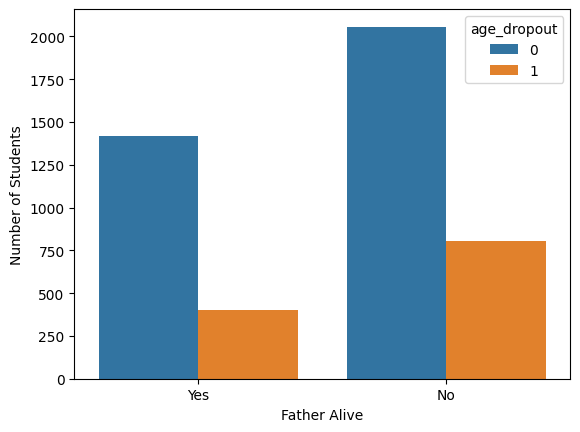

In [60]:
sns.countplot(data=data, x="father_alive", hue='age_dropout', hue_order=[0, 1])

plt.xticks(ticks=[0,1], labels=['Yes', 'No'])
plt.xlabel('Father Alive')
plt.ylabel('Number of Students')
plt.show()

In [61]:
# 1 - yes
# 2 - no
data["mother_alive"].value_counts()

1.0    2755
2.0    1978
Name: mother_alive, dtype: int64

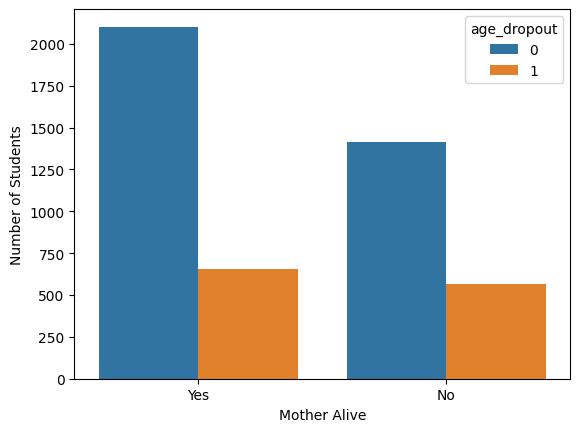

In [62]:
sns.countplot(data=data, x="mother_alive", hue='age_dropout', hue_order=[0, 1])

plt.xticks(ticks=[0,1], labels=['Yes', 'No'])
plt.xlabel('Mother Alive')
plt.ylabel('Number of Students')
plt.show()

## Heatmap for final features

<AxesSubplot:>

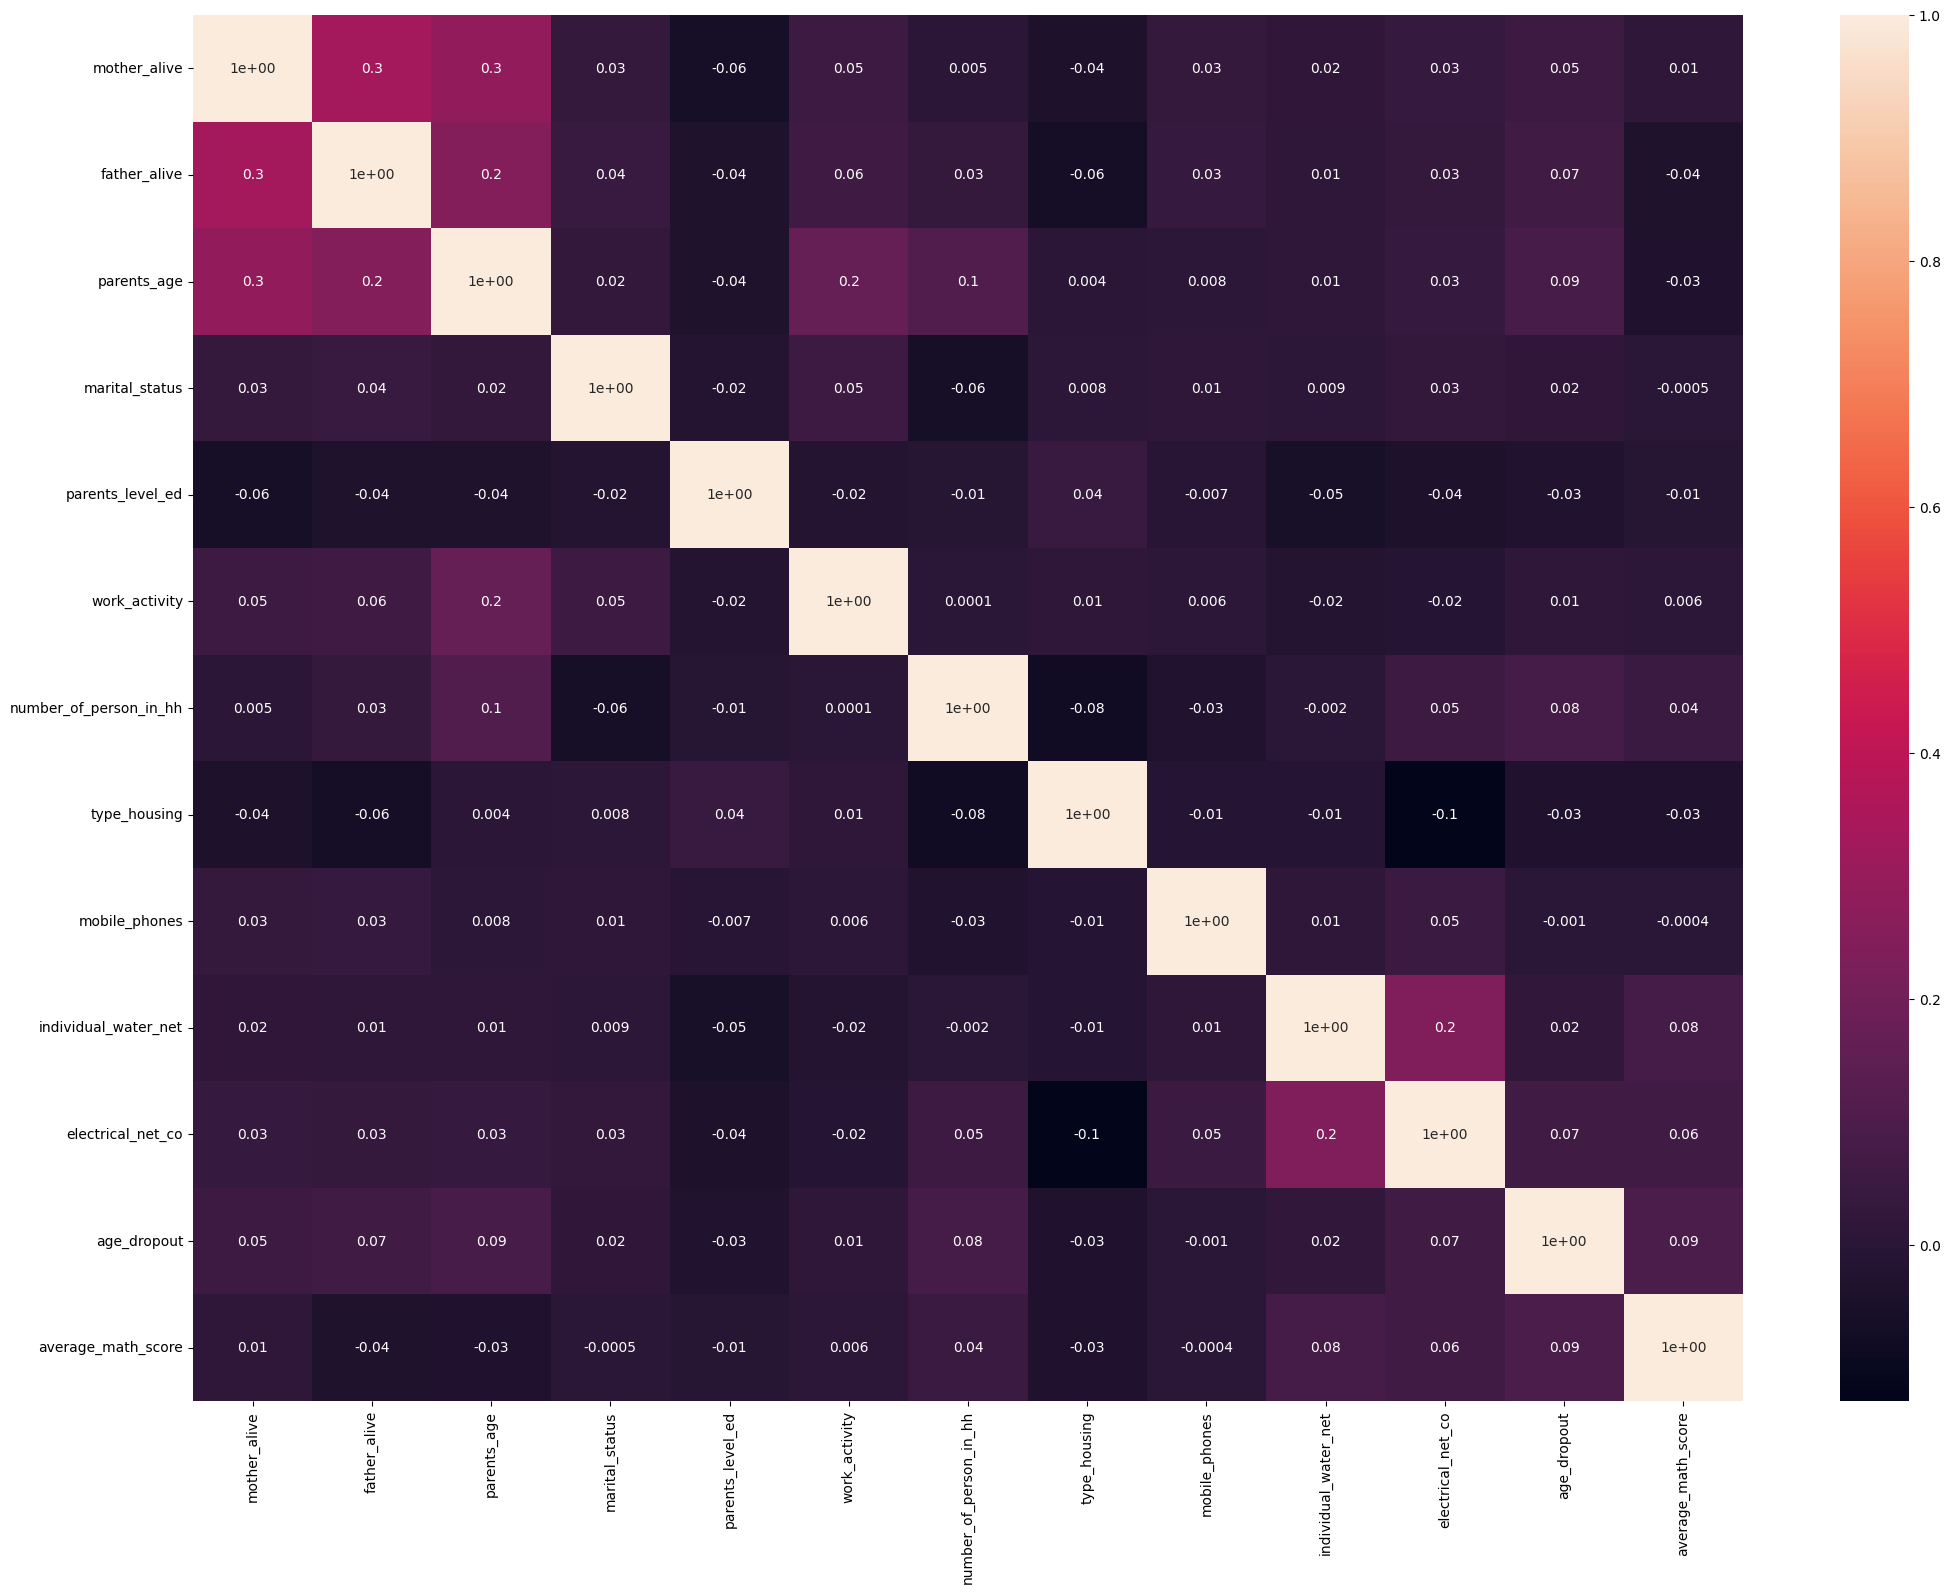

In [63]:
fix,ax=plt.subplots(1,1,figsize=(25,18))
sns.heatmap(data.corr(),annot=True,ax=ax,fmt='0.1')

# School Visits

In [64]:
raw_data = DropoutPred.get_data()
raw_data.keys()

dict_keys(['baseline_household', 'child_math_test_results', 'dropout_rate_correction', 'endline_household__part_1', 'endline_household__part_2', 'endline_household__part_3', 'household_awareness', 'household_weights', 'school_prelim', 'school_strata', 'school_visits', 'tayssir_admin', 'teacher_awareness_1', 'teacher_awareness_2', 'dropout-dataset', 'final_file_with_all_features'])

In [65]:
visits = raw_data["school_visits"]
visits.head()

,stud_id,schoolunitid,schoolid,type_unit,groupid,benef,region,province,hhid_tayssir,stud_id_tayssir,gender,age_2010,prob_age,niv_annee2,v0_id_batch,v0_n_fiche,v0_commentaire_v0,v0_i9,v0_i10,v0_i12_niveau,v0_i12_1,v0_i13,v0_i14,v0_i15,v0_i16,v0_i17,v0_id_enf,v0_position_e,v0_a1,v0_a2,v0_a3,v0_a4,v0_a5,v0_a6,v0_a7,v0_a8,v0_a9,v0_a9_second,merge_v0_v1,v1_id_enf_v1,v1_id_enf_old,v1_c2,v1_c3,v1_c4,v1_c5,v1_c6,v1_c7,v1_c8,v1_c9,v1_c10,v1_c11,v1_c12,v1_c13,v1_c14_1,v1_c14_2,v1_c15,v1_c16,v1_fid_batch,v1_id_enf_fed,v1_probleme_fedasso,v1_commentaire,v2_FID_BATCH,v2_id_enfant,v2_c12,v2_c13,v2_c14_1,v2_c14_2,v2_c16,v2_commentaire,merge_v1_v3,v3_id_enf,v3_c2,v3_c3,v3_c7,v3_c11,v3_c15,v3_c12,v3_c13,v3_c14_1,v3_c14_2,v3_c16,v3_n_enf,v3_id_enf_v3_quest,v3_id_enf_v3_fed,v3_fid_batch,v3_miss_v3,v3_commentaires,v4_id_enf,v4_id_batch,v4_n_page,v4_n_enf,v4_c2,v4_c3,v4_c4,v4_c5,v4_c6,v4_c7,v4_c8,v4_c12,v4_c12_b,v4_c11,v4_c11_b,v4_c13,v4_c14_1,v4_c14_2,v4_c15,v4_c16,v4_enf_nouv,v4_pas_dans_quest,v4_commentaires,v4_verif_doublon,v5_n_enf_quest,v5_c12,v5_c12_b,v5_niveau_quest,v5_c13_a,v5_c13_b,v5_c14_a,v5_c14_b,v5_c16,v5_enf_quest,v6_num,v6_c12,v6_c12_b,v6_niv_annee2,v6_c13_a,v6_c13_b,v6_c14_a,v6_c14_b,v6_v4_c15,v6_c16,q3_q11,q3_q12,q3_q13,q3_quest,q4_j9_1,q4_j9_2,q4_quest,v0_com_access,v0_date,v0_inacc,v1_com_access,v1_date,v1_heure,v1_inacc,v2_com_access,v2_date,v2_heure,v2_inacc,v3_com_access,v3_date,v3_heure,v3_inacc,v4_com_access,v4_date,v4_heure,v4_inacc,v5_com_access,v5_date,v5_heure,v5_inacc,v6_com_access,v6_date,v6_heure,v6_inacc,round,endline,studycode,unitobs,countrycode,ruralcode,gendercode,agecode,surveycode,year0,year1,year2,year3,year4,year5,year6
0,A00131005,A001,A127,Satellite,4,Mother,Meknhs - Tafilalet,Khenifra,T012435,T01243501,2,6.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"probleme V2 inconnu, quest non vérifié",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,NaN,NaN,0.0,6.0,F,NaN,NaN,1.0,NaN,1.0,2.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,10.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,8.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,310508.0,0,NaN,70309.0,AM,0,NaN,200409.0,AM,0,NaN,120509.0,M,0,NaN,281009.0,Morning,0,NaN,200210.0,Morning,0,"inacc, pas de données d'appel",170410.0,Morning,1,1,0,183,1,151,1,2.0,6.0,183_SV,2008,2009,2009,2009,2009,2010,2010
1,A00131007,A001,A127,Satellite,4,Mother,Meknhs - Tafilalet,Khenifra,T016963,T01696302,2,6.0,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"probleme V2 inconnu, quest non vérifié",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.0,NaN,NaN,0.0,6.0,F,NaN,NaN,1.0,NaN,1.0,2.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,9.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,7.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0,NaN,NaN,0,NaN,310508.0,0,NaN,70309.0,AM,0,NaN,200409.0,AM,0,NaN,120509.0,M,0,NaN,281009.0,Morning,0,NaN,200210.0,Morning,0,"inacc, pas de données d'appel",170410.0,Morning,1,1,0,183,1,151,1,2.0,6.0,183_SV,2008,2009,2009,2009,2009,2010,2010
2,A00132009,A001,A127,Satellite,4,Mother,Meknhs - Tafilalet,Khenifra,T000939,T00093903,2,7.0,0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"probleme V2 inconnu, quest non vérifié",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,NaN,NaN,1.0,7.0,F,NaN,NaN,1.0,NaN,2.0,2.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,20.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1.0,20.0,1.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0,3

In [69]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71355 entries, 0 to 71354
Columns: 181 entries, stud_id to year6
dtypes: float64(116), int64(25), object(40)
memory usage: 98.5+ MB


In [70]:
visits.describe()

,groupid,gender,age_2010,prob_age,niv_annee2,v0_id_batch,v0_n_fiche,v0_i9,v0_i10,v0_i12_niveau,v0_i12_1,v0_i13,v0_i14,v0_i15,v0_i16,v0_i17,v0_position_e,v0_a1,v0_a2,v0_a3,v0_a5,v0_a6,v0_a7,v0_a8,v0_a9,v0_a9_second,merge_v0_v1,v1_id_enf_old,v1_c2,v1_c3,v1_c4,v1_c5,v1_c7,v1_c8,v1_c9,v1_c10,v1_c11,v1_c12,v1_c14_1,v1_c14_2,v1_c15,v1_c16,v1_fid_batch,v1_id_enf_fed,v1_probleme_fedasso,v2_FID_BATCH,v2_c12,v2_c14_1,v2_c14_2,v2_c16,merge_v1_v3,v3_id_enf,v3_c2,v3_c3,v3_c7,v3_c11,v3_c15,v3_c12,v3_c14_1,v3_c14_2,v3_c16,v3_n_enf,v3_id_enf_v3_fed,v3_fid_batch,v3_miss_v3,v4_id_batch,v4_n_page,v4_n_enf,v4_c2,v4_c3,v4_c4,v4_c5,v4_c7,v4_c8,v4_c12,v4_c12_b,v4_c11,v4_c11_b,v4_c14_1,v4_c14_2,v4_c15,v4_c16,v4_enf_nouv,v4_pas_dans_quest,v4_verif_doublon,v5_n_enf_quest,v5_c12,v5_c12_b,v5_niveau_quest,v5_c13_a,v5_c13_b,v5_c14_a,v5_c14_b,v5_c16,v5_enf_quest,v6_num,v6_c12,v6_c12_b,v6_niv_annee2,v6_c13_a,v6_c13_b,v6_c14_a,v6_c14_b,v6_v4_c15,v6_c16,q3_q11,q3_q12,q3_q13,q3_quest,q4_j9_1,q4_j9_2,q4_quest,v0_date,v0_inacc,v1_date,v1_inacc,v2_date,v2_inacc,v3_date,v3_inacc,v4_date,v4_inacc,v5_date,v5_inacc,v6_date,v6_inacc,round,endline,studycode,unitobs,countrycode,ruralcode,gendercode,agecode,year0,year1,year2,year3,year4,year5,year6
count,71355.000000,71355.000000,69511.000000,71355.000000,71354.000000,0.0,0.0,42119.000000,43275.000000,43686.000000,43054.000000,43637.000000,43637.000000,43637.000000,43637.000000,43549.000000,43637.000000,0.0,0.0,42179.000000,0.0,0.0,0.0,0.0,43667.000000,1651.0,43558.000000,0.0,0.0,0.0,58651.000000,53899.000000,0.0,0.0,0.0,58416.000000,55465.000000,55424.000000,0.0,0.0,54474.000000,52471.000000,0.0,0.0,58704.000000,0.0,55183.000000,0.0,0.0,52541.000000,59466.000000,0.0,0.0,0.0,0.0,55194.000000,54142.000000,54228.000000,0.0,0.0,51540.000000,58686.000000,0.0,0.0,58686.000000,0.0,69307.000000,69987.000000,0.0,0.0,11917.000000,11554.000000,0.0,0.0,69937.000000,0.0,60330.000000,59803.000000,0.0,0.0,60100.000000,58161.000000,11941.0,58686.000000,58686.000000,61423.000000,57942.000000,0.0,61370.000000,1536.000000,1535.000000,0.0,0.0,49739.000000,71059.000000,62078.000000,61529.000000,0.0,62077.000000,1936.000000,1930.000000,0.0,0.0,60074.000000,56889.000000,9636.000000,9442.000000,4999.000000,71355.000000,2670.000000,2666.000000,71355.000000,68701.000000,71355.000000,68833.000000,71355.000000,69320.000000,71355.000000,66902.000000,71355.000000,70850.000000,71355.000000,71142.000000,71355.000000,70928.000000,71355.000000,71355.0,71355.0,71355.0,71355.0,71355.0,71355.0,71349.000000,69511.000000,71355.0,71355.0,71355.0,71355.0,71355.0,71355.0,71355.0
mean,1.873057,1.454208,10.692581,0.027622,3.558763,NaN,NaN,63.980650,1565.030942,2.764272,1.445348,1.088938,0.270298,2.857460,0.369022,2.504880,11.305429,NaN,NaN,9.788947,NaN,NaN,NaN,NaN,1.413745,88.0,2.986707,NaN,NaN,NaN,2.346217,9.453552,NaN,NaN,NaN,0.653605,3.098404,1.008679,NaN,NaN,2.689742,-0.369309,NaN,NaN,2.407928,NaN,-24.931193,NaN,NaN,-2.963305,2.970689,NaN,NaN,NaN,NaN,3.099087,2.698515,-28.264144,NaN,NaN,-4.264552,72.907917,NaN,NaN,0.001704,NaN,2.132988,63.148013,NaN,NaN,0.482588,6.921326,NaN,NaN,1.506399,NaN,3.167313,1.830176,NaN,NaN,3.020083,-2.433538,1.0,0.009048,0.000716,77.267978,-6.049411,NaN,3.175721,-18.201172,-16.500977,NaN,NaN,-0.737892,0.864394,77.011534,0.195046,NaN,3.223899,-16.818698,-9.033679,NaN,NaN,3.019975,-0.586405,-0.051889,1.471193,1.165233,0.141280,-0.935581,-1.739310,0.042071,155464.820134,0.037194,144144.174989,0.007175,185343.761973,0.039451,152288.468476,0.037250,211341.841214,0.031182,131416.416744,0.114806,182783.815700,0.027903,1.0,0.0,183.0,1.0,151.0,1.0,1.454330,10.692581,2008.0,2009.0,2009.0,2009.0,2009.0,2010.0,2010.0
std,1.360360,0.498071,3.405805,0.163890,1.907942,NaN,NaN,43.478153,847.665718,1.384461,0.509153,0.429828,0.754776,1.443352,0.533991,1.689937,9.235433,NaN,NaN,3.025894,NaN,NaN,NaN,NaN,0.996580,0.0,0.114526,NaN,NaN,NaN,1.650667,3.291379,NaN,NaN,NaN,6.763497,1.666333,0.760623,NaN,NaN,1.842610,14.057832,NaN,NaN,0.907022,NaN,43.911962,N

In [78]:
# 0.0    ??
# 1.0    Yes in all school
# 2.0    Yes, only in headmaster office
# 3.0    Yes, only in teachesr office
# 4.0    No electricity
# 5.0    ??

visits['v0_i15'].value_counts()

4.0    25908
1.0    14892
2.0     1598
3.0      577
0.0      414
5.0      248
Name: v0_i15, dtype: int64

In [82]:
visits.groupby("schoolid").all()

,stud_id,schoolunitid,type_unit,groupid,benef,region,province,hhid_tayssir,stud_id_tayssir,gender,age_2010,prob_age,niv_annee2,v0_id_batch,v0_n_fiche,v0_commentaire_v0,v0_i9,v0_i10,v0_i12_niveau,v0_i12_1,v0_i13,v0_i14,v0_i15,v0_i16,v0_i17,v0_id_enf,v0_position_e,v0_a1,v0_a2,v0_a3,v0_a4,v0_a5,v0_a6,v0_a7,v0_a8,v0_a9,v0_a9_second,merge_v0_v1,v1_id_enf_v1,v1_id_enf_old,v1_c2,v1_c3,v1_c4,v1_c5,v1_c6,v1_c7,v1_c8,v1_c9,v1_c10,v1_c11,v1_c12,v1_c13,v1_c14_1,v1_c14_2,v1_c15,v1_c16,v1_fid_batch,v1_id_enf_fed,v1_probleme_fedasso,v1_commentaire,v2_FID_BATCH,v2_id_enfant,v2_c12,v2_c13,v2_c14_1,v2_c14_2,v2_c16,v2_commentaire,merge_v1_v3,v3_id_enf,v3_c2,v3_c3,v3_c7,v3_c11,v3_c15,v3_c12,v3_c13,v3_c14_1,v3_c14_2,v3_c16,v3_n_enf,v3_id_enf_v3_quest,v3_id_enf_v3_fed,v3_fid_batch,v3_miss_v3,v3_commentaires,v4_id_enf,v4_id_batch,v4_n_page,v4_n_enf,v4_c2,v4_c3,v4_c4,v4_c5,v4_c6,v4_c7,v4_c8,v4_c12,v4_c12_b,v4_c11,v4_c11_b,v4_c13,v4_c14_1,v4_c14_2,v4_c15,v4_c16,v4_enf_nouv,v4_pas_dans_quest,v4_commentaires,v4_verif_doublon,v5_n_enf_quest,v5_c12,v5_c12_b,v5_niveau_quest,v5_c13_a,v5_c13_b,v5_c14_a,v5_c14_b,v5_c16,v5_enf_quest,v6_num,v6_c12,v6_c12_b,v6_niv_annee2,v6_c13_a,v6_c13_b,v6_c14_a,v6_c14_b,v6_v4_c15,v6_c16,q3_q11,q3_q12,q3_q13,q3_quest,q4_j9_1,q4_j9_2,q4_quest,v0_com_access,v0_date,v0_inacc,v1_com_access,v1_date,v1_heure,v1_inacc,v2_com_access,v2_date,v2_heure,v2_inacc,v3_com_access,v3_date,v3_heure,v3_inacc,v4_com_access,v4_date,v4_heure,v4_inacc,v5_com_access,v5_date,v5_heure,v5_inacc,v6_com_access,v6_date,v6_heure,v6_inacc,round,endline,studycode,unitobs,countrycode,ruralcode,gendercode,agecode,surveycode,year0,year1,year2,year3,year4,year5,year6
schoolid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A002,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,False,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
A006,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,False,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
A007,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True

In [83]:
hh_data = DropoutPred.get_training_data()
hh_data.head()

,hhid,gender,mother_alive,father_alive,parents_age,marital_status,darija,class_arabic,french,amazygh,read_one_lang,write_one_lang,no_read_write,parents_level_ed,work_activity,number_of_person_in_hh,type_housing,automobiles,mobile_phones,satellite_receivers,no_water,individual_water_net,electrical_net_co,school_id,child_enrollment,class_when_dropout,region,province,age_dropout,schoolunitid,type_unit,groupid,num_menage,done_test,digit_recognition_res,number_recognition_res,subtraction_res,division_res
0,A208004,1.0,1.0,1.0,35.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,5.0,3.0,2.0,1.0,1.0,2,2,1,A208,1.0,NaN,Marrakech - Tensift - Al Haouz,Essaouira,NaN,A208,Secteur Scolaire Centre,2,4,1.0,1.0,2.0,2.0,2.0
1,A426002,1.0,1.0,2.0,33.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,5.0,3.0,2.0,1.0,2.0,2,2,1,A426,1.0,NaN,Marrakech - Tensift - Al Haouz,Essaouira,NaN,A426,Secteur Scolaire Centre,4,2,2.0,NaN,NaN,NaN,NaN
2,A268006,1.0,1.0,1.0,31.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,7.0,2.0,2.0,1.0,2.0,2,2,2,A446,1.0,NaN,Marrakech - Tensift - Al Haouz,Chichaoua,NaN,A268,Satellite,1,6,1.0,1.0,1.0,2.0,2.0
3,A419004,1.0,2.0,2.0,62.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,6.0,1.0,2.0,1.0,1.0,2,2,1,A419,1.0,NaN,Sous - Massa - Draa,Taroudant,NaN,A419,Secteur Scolaire Centre,2,4,2.0,NaN,NaN,NaN,NaN
4,A536006,1.0,2.0,1.0,36.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,4.0,3.0,2.0,1.0,2.0,2,2,2,A212,1.0,NaN,Marrakech - Tensift - Al Haouz,Essaouira,NaN,A536,Satellite,1,6,1.0,1.0,1.0,1.0,2.0


In [85]:
hh_data.shape

(4832, 38)

In [88]:
grouped = visits.groupby('schoolid').apply(lambda x: x['v0_i15'])

In [89]:
grouped = grouped.reset_index(level='schoolid', drop=True)

In [90]:
grouped

10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
        ... 
71350    4.0
71351    4.0
71352    4.0
71353    4.0
71354    4.0
Name: v0_i15, Length: 71355, dtype: float64